In [1]:
%pylab inline
import pandas as pd
from sklearn import*
import seaborn as sns
from scipy import*

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_train=pd.read_csv('C:/Users/Bhumihar Rakesh/Desktop/Python/Arjun/Logistice Regression/carInsurance_train.csv', header=0)
data_train

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [3]:
data_test=pd.read_csv('C:/Users/Bhumihar Rakesh/Desktop/Python/Arjun/Logistice Regression/carInsurance_test.csv',header=0)
data_test

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4001.0,25.0,admin.,single,secondary,0.0,1.0,1.0,1.0,NaN,12.0,may,12.0,-1.0,0.0,NaN,17:17:42,17:18:06,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4002.0,40.0,management,married,tertiary,0.0,0.0,1.0,1.0,cellular,24.0,jul,1.0,-1.0,0.0,NaN,09:13:44,09:14:37,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4998.0,46.0,technician,married,tertiary,0.0,3009.0,0.0,0.0,cellular,4.0,aug,2.0,-1.0,0.0,NaN,10:23:35,10:24:33,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,4999.0,60.0,retired,married,secondary,0.0,7038.0,0.0,0.0,telephone,7.0,oct,4.0,-1.0,0.0,NaN,17:01:49,17:04:07,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_train.shape

(4000, 19)

In [5]:
data_train.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [6]:
data_train.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [8]:
data_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [9]:
data_train.describe(include=np.object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:27:56,11:27:46
freq,893,2304,1988,2831,1049,437,3,3


In [10]:
data_train.Job.value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [11]:
data_train.Marital.value_counts()

married     2304
single      1213
divorced     483
Name: Marital, dtype: int64

In [12]:
data_train.LastContactMonth.value_counts()

may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: LastContactMonth, dtype: int64

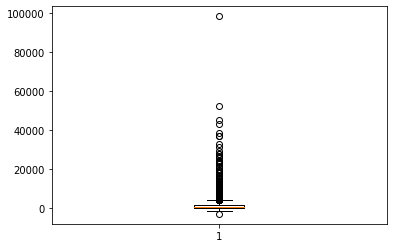

In [13]:
plt.boxplot(data_train['Balance'])
plt.show()

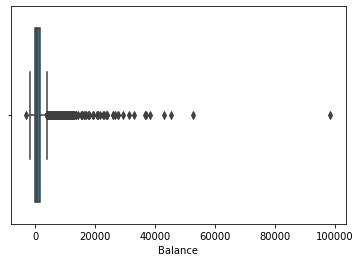

In [14]:
sns.boxplot(data_train['Balance'])

In [15]:
data_train[data_train['Balance']>40000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
163,164,61,self-employed,divorced,tertiary,0,52587,0,0,cellular,15,feb,3,189,1,success,16:53:39,17:00:13,1
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0
3251,3252,39,technician,single,NaN,0,45248,1,0,NaN,6,may,1,-1,0,NaN,09:23:35,09:50:38,1
3304,3305,55,management,single,tertiary,0,43074,1,0,cellular,25,aug,6,-1,0,NaN,15:06:04,15:07:36,0


In [16]:
#Insurance_Data = Insurance_Data.drop(Insurance_Data[Insurance_Data.index==1742].index)

In [17]:
data_tarin=data_train.drop(index=1742,inplace=True)


In [18]:
data_train.shape

(3999, 19)

In [19]:
data_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [20]:
#data_train.boxplot(by='Balance', column='Age')

In [21]:
New_data = pd.concat([data_train,data_test],keys=('train','test'))
#pd.concat([data_train,data_test],keys=('train','test'))

In [22]:
New_data

Id   Age          Job  Marital  Education  Default  Balance  \
train 0        1.0  32.0   management   single   tertiary      0.0   1218.0   
      1        2.0  32.0  blue-collar  married    primary      0.0   1156.0   
      2        3.0  29.0   management   single   tertiary      0.0    637.0   
      3        4.0  25.0      student   single    primary      0.0    373.0   
      4        5.0  30.0   management  married   tertiary      0.0   2694.0   
...            ...   ...          ...      ...        ...      ...      ...   
test  1995  4998.0  46.0   technician  married   tertiary      0.0   3009.0   
      1996     NaN   NaN          NaN      NaN        NaN      NaN      NaN   
      1997  4999.0  60.0      retired  married  secondary      0.0   7038.0   
      1998     NaN   NaN          NaN      NaN        NaN      NaN      NaN   
      1999  5000.0  28.0   management   single   tertiary      0.0    957.0   

            HHInsurance  CarLoan Communication  LastContactDay  \
train 0             1.0      0.0     telephone            28.0   
      1             1.0      0.0           NaN            26.0   
      2             1.0      0.0      cellular             3.0   
      3             1.0      0.0      cellular            11.0   
      4             0.0      0.0      cellular             3.0   
...                 ...      ...           ...             ...   
test  1995          0.0      0.0      cellular             4.0   
      1996          NaN      NaN           NaN             NaN   
      1997          0.0      0.0     telephone             7.0   
      1998          NaN      NaN           NaN             NaN   
      1999          0.0      0.0      cellular            25.0   

           LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                 jan           2.0        -1.0           0.0      NaN   
      1                 may           5.0        -1.0           0.0      NaN   
      2                 jun           1.0       119.0           1.0  failure   
      3                 may           2.0        -1.0           0.0      NaN   
      4                 jun           1.0        -1.0           0.0      NaN   
...                     ...           ...         ...           ...      ...   
test  1995              aug           2.0        -1.0           0.0      NaN   
      1996              NaN           NaN         NaN           NaN      NaN   
      1997              oct           4.0        -1.0           0.0      NaN   
      1998              NaN           NaN         NaN           NaN      NaN   
      1999              may           2.0        -1.0           0.0      NaN   

           CallStart   CallEnd  CarInsurance  
train 0     13:45:20  13:46:30           0.0  
      1     14:49:03  14:52:08           0.0  
      2     16:30:24  16:36:04           1.0  
      3     12:06:43  12:20:22           1.0  
      4     14:35:44  14:38:56           0.0  
...              ...       ...           ...  
test  1995  10:23:35  10:24:33           NaN  
      1996       NaN       NaN           NaN  
      1997  17:01:49  17:04:07           NaN  
      1998       NaN       NaN           NaN  
      1999  12:15:19  12:30:34           NaN  

[5999 rows x 19 columns]

In [23]:
data1=New_data.drop(columns=['Id','CarInsurance'])

In [24]:
data1

Age          Job  Marital  Education  Default  Balance  \
train 0     32.0   management   single   tertiary      0.0   1218.0   
      1     32.0  blue-collar  married    primary      0.0   1156.0   
      2     29.0   management   single   tertiary      0.0    637.0   
      3     25.0      student   single    primary      0.0    373.0   
      4     30.0   management  married   tertiary      0.0   2694.0   
...          ...          ...      ...        ...      ...      ...   
test  1995  46.0   technician  married   tertiary      0.0   3009.0   
      1996   NaN          NaN      NaN        NaN      NaN      NaN   
      1997  60.0      retired  married  secondary      0.0   7038.0   
      1998   NaN          NaN      NaN        NaN      NaN      NaN   
      1999  28.0   management   single   tertiary      0.0    957.0   

            HHInsurance  CarLoan Communication  LastContactDay  \
train 0             1.0      0.0     telephone            28.0   
      1             1.0      0.0           NaN            26.0   
      2             1.0      0.0      cellular             3.0   
      3             1.0      0.0      cellular            11.0   
      4             0.0      0.0      cellular             3.0   
...                 ...      ...           ...             ...   
test  1995          0.0      0.0      cellular             4.0   
      1996          NaN      NaN           NaN             NaN   
      1997          0.0      0.0     telephone             7.0   
      1998          NaN      NaN           NaN             NaN   
      1999          0.0      0.0      cellular            25.0   

           LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                 jan           2.0        -1.0           0.0      NaN   
      1                 may           5.0        -1.0           0.0      NaN   
      2                 jun           1.0       119.0           1.0  failure   
      3                 may           2.0        -1.0           0.0      NaN   
      4                 jun           1.0        -1.0           0.0      NaN   
...                     ...           ...         ...           ...      ...   
test  1995              aug           2.0        -1.0           0.0      NaN   
      1996              NaN           NaN         NaN           NaN      NaN   
      1997              oct           4.0        -1.0           0.0      NaN   
      1998              NaN           NaN         NaN           NaN      NaN   
      1999              may           2.0        -1.0           0.0      NaN   

           CallStart   CallEnd  
train 0     13:45:20  13:46:30  
      1     14:49:03  14:52:08  
      2     16:30:24  16:36:04  
      3     12:06:43  12:20:22  
      4     14:35:44  14:38:56  
...              ...       ...  
test  1995  10:23:35  10:24:33  
      1996       NaN       NaN  
      1997  17:01:49  17:04:07  
      1998       NaN       NaN  
      1999  12:15:19  12:30:34  

[5999 rows x 17 columns]

In [25]:
data1.shape

(5999, 17)

In [26]:
Missing=data1.isnull().sum()
Missing

Age                 1000
Job                 1024
Marital             1000
Education           1216
Default             1000
Balance             1000
HHInsurance         1000
CarLoan             1000
Communication       2123
LastContactDay      1000
LastContactMonth    1000
NoOfContacts        1000
DaysPassed          1000
PrevAttempts        1000
Outcome             4798
CallStart           1000
CallEnd             1000
dtype: int64

In [27]:
data_train.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [28]:
data2=data1.copy()

In [29]:
data2

Age          Job  Marital  Education  Default  Balance  \
train 0     32.0   management   single   tertiary      0.0   1218.0   
      1     32.0  blue-collar  married    primary      0.0   1156.0   
      2     29.0   management   single   tertiary      0.0    637.0   
      3     25.0      student   single    primary      0.0    373.0   
      4     30.0   management  married   tertiary      0.0   2694.0   
...          ...          ...      ...        ...      ...      ...   
test  1995  46.0   technician  married   tertiary      0.0   3009.0   
      1996   NaN          NaN      NaN        NaN      NaN      NaN   
      1997  60.0      retired  married  secondary      0.0   7038.0   
      1998   NaN          NaN      NaN        NaN      NaN      NaN   
      1999  28.0   management   single   tertiary      0.0    957.0   

            HHInsurance  CarLoan Communication  LastContactDay  \
train 0             1.0      0.0     telephone            28.0   
      1             1.0      0.0           NaN            26.0   
      2             1.0      0.0      cellular             3.0   
      3             1.0      0.0      cellular            11.0   
      4             0.0      0.0      cellular             3.0   
...                 ...      ...           ...             ...   
test  1995          0.0      0.0      cellular             4.0   
      1996          NaN      NaN           NaN             NaN   
      1997          0.0      0.0     telephone             7.0   
      1998          NaN      NaN           NaN             NaN   
      1999          0.0      0.0      cellular            25.0   

           LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                 jan           2.0        -1.0           0.0      NaN   
      1                 may           5.0        -1.0           0.0      NaN   
      2                 jun           1.0       119.0           1.0  failure   
      3                 may           2.0        -1.0           0.0      NaN   
      4                 jun           1.0        -1.0           0.0      NaN   
...                     ...           ...         ...           ...      ...   
test  1995              aug           2.0        -1.0           0.0      NaN   
      1996              NaN           NaN         NaN           NaN      NaN   
      1997              oct           4.0        -1.0           0.0      NaN   
      1998              NaN           NaN         NaN           NaN      NaN   
      1999              may           2.0        -1.0           0.0      NaN   

           CallStart   CallEnd  
train 0     13:45:20  13:46:30  
      1     14:49:03  14:52:08  
      2     16:30:24  16:36:04  
      3     12:06:43  12:20:22  
      4     14:35:44  14:38:56  
...              ...       ...  
test  1995  10:23:35  10:24:33  
      1996       NaN       NaN  
      1997  17:01:49  17:04:07  
      1998       NaN       NaN  
      1999  12:15:19  12:30:34  

[5999 rows x 17 columns]

In [30]:
data2.groupby('Outcome').count()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd
Outcome,,,,,,,,,,,,,,,,
failure,548,546,548,525,548,548,548,548,544,548,548,548,548,548,548,548
other,248,248,248,236,248,248,248,248,247,248,248,248,248,248,248,248
success,405,402,405,378,405,405,405,405,403,405,405,405,405,405,405,405


In [31]:
data2.Outcome.value_counts()

failure    548
success    405
other      248
Name: Outcome, dtype: int64

In [32]:
data2.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [33]:
#merge_data_df['Outcome'][merge_data_df.isnull()['Outcome']] = 'NoPref'
data2['Outcome'][data2.isnull()['Outcome']]='NoPref'

C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
data2.Communication.value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [35]:
data2.Communication.fillna('None',inplace=True)

In [36]:
data2.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [37]:
edu_mode=[]

In [38]:
Job_Type=data2.Job.value_counts().index
Job_Type

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [39]:
data2.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [40]:
#for job in job_types:
   # mode = merge_data_df[merge_data_df.Job==job]['Education'].value_counts().nlargest(1).index
    #edu_mode = np.append(edu_mode,mode)
#edu_map=pd.Series(edu_mode,index=merge_data_df.Job.value_counts().index)

#edu_map

In [41]:
for job in Job_Type:
    mode=data2[data2.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode=np.append(edu_mode,mode)
    
edu_map=pd.Series(edu_mode,index=data2.Job.value_counts())
edu_map

Job
1113     tertiary
937     secondary
823     secondary
586     secondary
414     secondary
326     secondary
182      tertiary
164     secondary
158     secondary
149      tertiary
123       primary
dtype: object

In [42]:
data2_number=data2.select_dtypes(include=np.number)
data2_number

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32.0      0.0   1218.0          1.0      0.0            28.0   
      1     32.0      0.0   1156.0          1.0      0.0            26.0   
      2     29.0      0.0    637.0          1.0      0.0             3.0   
      3     25.0      0.0    373.0          1.0      0.0            11.0   
      4     30.0      0.0   2694.0          0.0      0.0             3.0   
...          ...      ...      ...          ...      ...             ...   
test  1995  46.0      0.0   3009.0          0.0      0.0             4.0   
      1996   NaN      NaN      NaN          NaN      NaN             NaN   
      1997  60.0      0.0   7038.0          0.0      0.0             7.0   
      1998   NaN      NaN      NaN          NaN      NaN             NaN   
      1999  28.0      0.0    957.0          0.0      0.0            25.0   

            NoOfContacts  DaysPassed  PrevAttempts  
train 0              2.0        -1.0           0.0  
      1              5.0        -1.0           0.0  
      2              1.0       119.0           1.0  
      3              2.0        -1.0           0.0  
      4              1.0        -1.0           0.0  
...                  ...         ...           ...  
test  1995           2.0        -1.0           0.0  
      1996           NaN         NaN           NaN  
      1997           4.0        -1.0           0.0  
      1998           NaN         NaN           NaN  
      1999           2.0        -1.0           0.0  

[5999 rows x 9 columns]

In [43]:
data2_object=data2.select_dtypes(include=np.object)
data2_object

Job  Marital  Education Communication LastContactMonth  \
train 0      management   single   tertiary     telephone              jan   
      1     blue-collar  married    primary          None              may   
      2      management   single   tertiary      cellular              jun   
      3         student   single    primary      cellular              may   
      4      management  married   tertiary      cellular              jun   
...                 ...      ...        ...           ...              ...   
test  1995   technician  married   tertiary      cellular              aug   
      1996          NaN      NaN        NaN          None              NaN   
      1997      retired  married  secondary     telephone              oct   
      1998          NaN      NaN        NaN          None              NaN   
      1999   management   single   tertiary      cellular              may   

            Outcome CallStart   CallEnd  
train 0      NoPref  13:45:20  13:46:30  
      1      NoPref  14:49:03  14:52:08  
      2     failure  16:30:24  16:36:04  
      3      NoPref  12:06:43  12:20:22  
      4      NoPref  14:35:44  14:38:56  
...             ...       ...       ...  
test  1995   NoPref  10:23:35  10:24:33  
      1996   NoPref       NaN       NaN  
      1997   NoPref  17:01:49  17:04:07  
      1998   NoPref       NaN       NaN  
      1999   NoPref  12:15:19  12:30:34  

[5999 rows x 8 columns]

In [44]:
data2.drop(['CallStart','CallEnd'],axis=1,inplace=True)

In [45]:
data2_Dummeies=pd.get_dummies(data2_object)

In [46]:
data2_Dummeies

Job_admin.  Job_blue-collar  Job_entrepreneur  Job_housemaid  \
train 0              0                0                 0              0   
      1              0                1                 0              0   
      2              0                0                 0              0   
      3              0                0                 0              0   
      4              0                0                 0              0   
...                ...              ...               ...            ...   
test  1995           0                0                 0              0   
      1996           0                0                 0              0   
      1997           0                0                 0              0   
      1998           0                0                 0              0   
      1999           0                0                 0              0   

            Job_management  Job_retired  Job_self-employed  Job_services  \
train 0                  1            0                  0             0   
      1                  0            0                  0             0   
      2                  1            0                  0             0   
      3                  0            0                  0             0   
      4                  1            0                  0             0   
...                    ...          ...                ...           ...   
test  1995               0            0                  0             0   
      1996               0            0                  0             0   
      1997               0            1                  0             0   
      1998               0            0                  0             0   
      1999               1            0                  0             0   

            Job_student  Job_technician  ...  CallEnd_18:12:02  \
train 0               0               0  ...                 0   
      1               0               0  ...                 0   
      2               0               0  ...                 0   
      3               1               0  ...                 0   
      4               0               0  ...                 0   
...                 ...             ...  ...               ...   
test  1995            0               1  ...                 0   
      1996            0               0  ...                 0   
      1997            0               0  ...                 0   
      1998            0               0  ...                 0   
      1999            0               0  ...                 0   

            CallEnd_18:12:27  CallEnd_18:13:26  CallEnd_18:13:35  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
test  1995                 0                 0                 0   
      1996                 0                 0                 0   
      1997                 0                 0                 0   
      1998                 0                 0                 0   
      1999                 0                 0                 0   

            CallEnd_18:14:02  CallEnd_18:14:22  CallEnd_18:16:02  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
test  1995                 0                 0                 0   
      1996                 0    

In [47]:
data2_new=pd.concat([data2_number,data2_Dummeies],axis=1)
data2_new

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32.0      0.0   1218.0          1.0      0.0            28.0   
      1     32.0      0.0   1156.0          1.0      0.0            26.0   
      2     29.0      0.0    637.0          1.0      0.0             3.0   
      3     25.0      0.0    373.0          1.0      0.0            11.0   
      4     30.0      0.0   2694.0          0.0      0.0             3.0   
...          ...      ...      ...          ...      ...             ...   
test  1995  46.0      0.0   3009.0          0.0      0.0             4.0   
      1996   NaN      NaN      NaN          NaN      NaN             NaN   
      1997  60.0      0.0   7038.0          0.0      0.0             7.0   
      1998   NaN      NaN      NaN          NaN      NaN             NaN   
      1999  28.0      0.0    957.0          0.0      0.0            25.0   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 0              2.0        -1.0           0.0           0  ...   
      1              5.0        -1.0           0.0           0  ...   
      2              1.0       119.0           1.0           0  ...   
      3              2.0        -1.0           0.0           0  ...   
      4              1.0        -1.0           0.0           0  ...   
...                  ...         ...           ...         ...  ...   
test  1995           2.0        -1.0           0.0           0  ...   
      1996           NaN         NaN           NaN           0  ...   
      1997           4.0        -1.0           0.0           0  ...   
      1998           NaN         NaN           NaN           0  ...   
      1999           2.0        -1.0           0.0           0  ...   

            CallEnd_18:12:02  CallEnd_18:12:27  CallEnd_18:13:26  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
test  1995                 0                 0                 0   
      1996                 0                 0                 0   
      1997                 0                 0                 0   
      1998                 0                 0                 0   
      1999                 0                 0                 0   

            CallEnd_18:13:35  CallEnd_18:14:02  CallEnd_18:14:22  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
test  1995                 0                 0                 0   
      1996                 0                 0                 0   
      1997                 0                 0                 0   
      1998                 0                 0                 0   
      1999                 0                 0                 0   

            CallEnd_18:16:02  CallEnd_18:18:21  CallEnd_18:20:17  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
test  1995                 0                 0                 0   
      1996                 0                 0                 0   
 

In [48]:
data2_new.isna().sum()

Age                 1000
Default             1000
Balance             1000
HHInsurance         1000
CarLoan             1000
                    ... 
CallEnd_18:14:22       0
CallEnd_18:16:02       0
CallEnd_18:18:21       0
CallEnd_18:20:17       0
CallEnd_18:25:31       0
Length: 9314, dtype: int64

In [49]:
idx=pd.IndexSlice
x_train=data2_new.loc[idx[['train',],:]]
x_train

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32.0      0.0   1218.0          1.0      0.0            28.0   
      1     32.0      0.0   1156.0          1.0      0.0            26.0   
      2     29.0      0.0    637.0          1.0      0.0             3.0   
      3     25.0      0.0    373.0          1.0      0.0            11.0   
      4     30.0      0.0   2694.0          0.0      0.0             3.0   
...          ...      ...      ...          ...      ...             ...   
      3995  28.0      0.0      0.0          1.0      0.0            25.0   
      3996  49.0      0.0    124.0          1.0      1.0            29.0   
      3997  27.0      0.0   -400.0          0.0      1.0             8.0   
      3998  36.0      0.0    658.0          1.0      0.0            29.0   
      3999  45.0      0.0    137.0          1.0      0.0             9.0   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 0              2.0        -1.0           0.0           0  ...   
      1              5.0        -1.0           0.0           0  ...   
      2              1.0       119.0           1.0           0  ...   
      3              2.0        -1.0           0.0           0  ...   
      4              1.0        -1.0           0.0           0  ...   
...                  ...         ...           ...         ...  ...   
      3995           1.0        40.0           2.0           0  ...   
      3996          19.0        -1.0           0.0           1  ...   
      3997           1.0        -1.0           0.0           1  ...   
      3998           1.0       227.0           3.0           0  ...   
      3999           2.0        -1.0           0.0           0  ...   

            CallEnd_18:12:02  CallEnd_18:12:27  CallEnd_18:13:26  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
      3995                 0                 0                 0   
      3996                 0                 0                 0   
      3997                 0                 0                 0   
      3998                 0                 0                 0   
      3999                 0                 0                 0   

            CallEnd_18:13:35  CallEnd_18:14:02  CallEnd_18:14:22  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
      3995                 0                 0                 0   
      3996                 0                 0                 0   
      3997                 0                 0                 0   
      3998                 0                 0                 0   
      3999                 0                 0                 0   

            CallEnd_18:16:02  CallEnd_18:18:21  CallEnd_18:20:17  \
train 0                    0                 0                 0   
      1                    0                 0                 0   
      2                    0                 0                 0   
      3                    0                 0                 0   
      4                    0                 0                 0   
...                      ...               ...               ...   
      3995                 0                 0                 0   
      3996                 0                 0                 0   
 

In [83]:
x_test=data2_new.loc[idx['test'],:]
x_test.shape

(2000, 9314)

In [51]:
y_train=data_train.CarInsurance
y_train.shape

(3999,)

In [52]:
x=data2_new.iloc[:,0:46]
y=data_train.iloc[:,18]


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train, test_size=.3)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression(solver = 'liblinear', class_weight="balanced")

In [57]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred=lr.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [80]:
print('Accuracy is :',accuracy)
print('percision is :', precision)
print('recall:', recall)
print('roc_auc :', roc_auc)
print('Confussion matrix :\n', cm)


Accuracy is : 0.7058333333333333
percision is : 0.6422018348623854
recall: 0.5870020964360587
roc_auc : 0.6856172307906434
Confussion matrix :
 [[567 156]
 [197 280]]


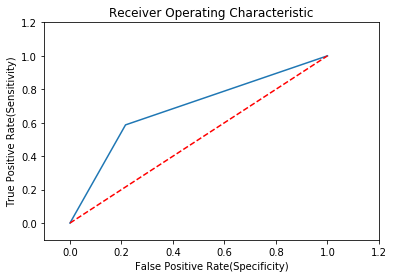

Area under the curve:  0.686


In [81]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

print("Area under the curve: ",round(auc(false_positive_rate, true_positive_rate),3))